In this project, we will generate a few kinds of object structures:

- Triangle: Right triangle that has shorter edges parallel to axis

   ``
O
OOO
OOOOO
   ``
- Rectangle: Small rectangle

- L shape

   ``
O
O
OOOOO
   ``

In [5]:
from random import random
from random import randint
from random import choice
from numpy import array
from numpy import zeros
import numpy as np

In [6]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot

In [7]:
def check_in_frame ( size, pos ):
    """
    Allow space around the shape
    """
    if 0 <= pos[0] < size and  0 <= pos[1] < size:
        return True
    return False

def check_in_frame_with_space ( size, pos ):
    """
    Allow space around the shape
    """
    if 1 <= pos[0] < size - 1 and  1 <= pos[1] < size - 1:
        return True
    return False

In [51]:
def generate_rectangle(frame , width, height, position, color):
    """
    Parameters:
    =====================
    frame: squared frame
    width: width of rectangle
    height: height of rectangle
    position: tuple of 2
    color: (color the cells with this value)
    
    Returns:
    =====================
    - success: whether imposition successes or not
    """
    size = frame.shape[0]
    other_corner = ( position[0] + height - 1, position[1] + width - 1 )
    
    if not check_in_frame ( size, position ) or not check_in_frame ( size, other_corner ):
        return False
    
    frame[ position[0] : position[0] + height, 
          position[1] : position[1] + width] = np.ones((height, width)) * color
    
    return True

#### Test

In [9]:
f = zeros ((10, 10))

generate_rectangle(f, 4, 2, (2,2), 2)

print (f)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  2.  2.  2.  2.  0.  0.  0.  0.]
 [ 0.  0.  2.  2.  2.  2.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [49]:
def generate_triangle(frame, side, direction, position, color):
    """
    Impose an triangle shape structure on the frame, position is where you start it (top-left corner of rectangle)
    
    This is a triangle with side = 4, direction = 0
    
    S
    o o 
    o o o
    o o o o
    
    direction = 1
    
    S o o o
    o o o 
    o o
    o 
    
    direction = 2
    
    S o o o
      o o o 
        o o
          o 
    
    direction = 3
    
    S     o
        o o 
      o o o
    o o o o
    
    Parameters:
    =====================
    frame: squared frame
    side: length of the shorter side of triangle
    direction: 
    position: tuple of 2
    color: (color the cells with this value)
    
    Returns:
    =====================
    - success: whether imposition successes or not
    
    """
    size = frame.shape[0]
    other_corner = ( position[0] + side - 1, position[1] + side - 1 )
    
    if not check_in_frame ( size, position) or not check_in_frame ( size, other_corner ):
        return False
    
    inner_shape = np.tril(np.ones((side, side)) * color)
    
    # Generate for direction == 0, and rotate it to the correct direction
    rotated_shape = np.rot90 ( inner_shape, -direction )
    
    
    frame[ position[0] : position[0] + rotated_shape.shape[0], 
          position[1] : position[1] + rotated_shape.shape[1] ] = rotated_shape
    
    return True

#### Test

In [11]:
f = zeros ((10, 10))

generate_triangle(f, 4, 3, (2,2), 1)

print (f)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  1.  1.  0.  0.  0.  0.]
 [ 0.  0.  1.  1.  1.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [50]:
def generate_l_shape(frame, width, height, direction, position, color):
    """
    Impose an triangle shape structure on the frame, position is where you start it (top-left corner of rectangle)
    
    This is a triangle with width = 4, height = 3, direction = 0
    
    S
    o 
    o o o o
    
    direction = 1
    
    S o o o
    o 
    o
    
    direction = 2
    
    S o o o
          o 
          o
    
    direction = 3
    
    S     o
          o 
    o o o o
    
    Parameters:
    =====================
    frame: squared frame
    width: width of rectangle
    height: height of rectangle
    direction: 
    position: tuple of 2
    color: (color the cells with this value)
    
    Returns:
    =====================
    - success: whether imposition successes or not
    
    """
    size = frame.shape[0]
    other_corner = ( position[0] + height - 1, position[1] + width - 1 )
    
    if not check_in_frame ( size, position) or not check_in_frame ( size, other_corner ):
        return False
    
    if direction == 0 or direction == 3:
        frame[ position[0] + height - 1,  position[1] : position[1] + width ] = color
    
    if direction == 1 or direction == 2:
        frame[ position[0]             ,  position[1] : position[1] + width ] = color
        
    if direction == 0 or direction == 1:
        frame[ position[0]: position[0] + height,  position[1] ] = color
        
    if direction == 2 or direction == 3:
        frame[ position[0]: position[0] + height,  position[1] + width - 1 ] = color
    
    return True

#### Test

In [52]:
f = zeros ((10, 10))

generate_l_shape(f, 3, 2, 0, (2,2), 1)

print (f)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [53]:
generate_l_shape(f, 3, 2, 0, (4,4), 5)

print (f)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  5.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  5.  5.  5.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [54]:
generate_l_shape(f, 3, 2, 0, (0,5), 3)

print (f)

[[ 0.  0.  0.  0.  0.  3.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  3.  3.  3.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  5.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  5.  5.  5.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


### Create a color codes

In [135]:
codes = ['white', 'green', 'blue', 'yellow', 'purple', 'red']
cm = mpl.colors.ListedColormap(codes)

In [185]:
# Plot function with colors
def plot( frame , l = None):
    # This method might code pixel's value % len(codes) == 0 to be white
    color_frame = frame
    color_frame[np.where ( (color_frame % len(codes) == 0) & (color_frame != 0 ) )] = len(codes) - 1
    color_frame = color_frame % len(codes)
    
    # create a gray scale subplot for each frame
    pyplot.imshow(color_frame, cmap=cm )
    # turn of the scale to make it clearer
    ax = pyplot.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # show the plot
    pyplot.show()

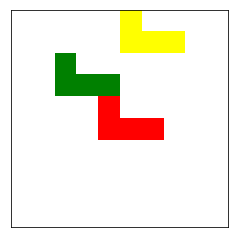

In [58]:
plot(f)

Notice that pixel values in the image would be mapped to range (0, 1) before mapping to the real color values

In [94]:
import generate_rectangle
from importlib import reload

In [124]:
reload(generate_rectangle)

<module 'generate_rectangle' from '/Users/tuando/git/learn-to-perform/target/generate_rectangle.py'>

In [30]:
generate_rectangle.generate_path(f, (1,1), (5,3 ))

[(1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (5, 2), (5, 3)]

In [62]:
np.where( f == 1)

(array([2, 3, 3, 3]), array([2, 2, 3, 4]))

In [76]:
generate_rectangle.shortest_path(f, 1, 3)

[(1, 2), (0, 2), (0, 3), (0, 4)]

In [194]:
f = generate_rectangle.generate_frame ( 15, 3, 3, 2, (2, 3) )

6
2
(4, 0, 2, 3)
(11, 4, 3, 3)
(0, 3, 3, 3)
(11, 10, 3, 2)
(0, 10, 3, 3)
(2, 7, 2, 2)


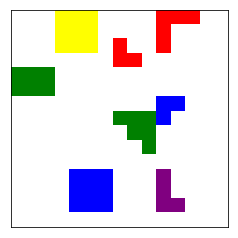

In [195]:
plot(f)

In [158]:
f[ np.where ( ((f % 5 == 0) & (f != 0 )))]

array([ 5.,  5.,  5.])